In [6]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as st
from config import gkey
import gmaps
import requests
import time

ModuleNotFoundError: No module named 'config'

In [7]:
# Load the Size History by County csv to a DataFrame
size_history_data_path = "../cleaned_data/Electric_Vehicle_Population_Size_History_By_County_Cleaned.csv"
size_history_full_data = pd.read_csv(size_history_data_path)

In [8]:
size_history_full_data.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,January 31 2017,Juneau,AK,Passenger,0,1,1,49,50,2.00
1,January 31 2017,Dale,AL,Passenger,0,1,1,71,72,1.39
2,January 31 2017,Russell,AL,Passenger,1,0,1,53,54,1.85
3,January 31 2017,Maricopa,AZ,Passenger,2,0,2,1774,1776,0.11
4,January 31 2017,Pima,AZ,Passenger,0,1,1,439,440,0.23


In [9]:
# Refine to most recent date in history (October 31 2021)
size_history_data = size_history_full_data.loc[size_history_full_data["Date"]=="October 31 2021"]
size_history_data

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
11420,October 31 2021,Fairbanks North Star,AK,Passenger,0,1,1,62,63,1.59
11421,October 31 2021,Montgomery,AL,Passenger,0,1,1,30,31,3.23
11422,October 31 2021,Maricopa,AZ,Passenger,1,0,1,597,598,0.17
11423,October 31 2021,Alameda,CA,Passenger,1,0,1,157,158,0.63
11424,October 31 2021,Fresno,CA,Passenger,1,0,1,128,129,0.78
...,...,...,...,...,...,...,...,...,...,...
11609,October 31 2021,Whitman,WA,Passenger,69,57,126,21414,21540,0.58
11610,October 31 2021,Whitman,WA,Truck,2,0,2,8338,8340,0.02
11611,October 31 2021,Yakima,WA,Passenger,282,166,448,163726,164174,0.27
11612,October 31 2021,Yakima,WA,Truck,5,0,5,59634,59639,0.01


# State and County with most EVs

In [10]:
# Copy and group dataframe into Counties, then summarise columns of interest
county_data_EV_count = size_history_data.groupby("County")["Electric Vehicle (EV) Total"].sum()
county_data_total_count = size_history_data.groupby("County")["Total Vehicles"].sum()
county_data_percent = (county_data_EV_count / county_data_total_count)*100
county_data_percent = county_data_percent.map("{:.2f}".format)

# Assemble columns into dataframe
county_data = pd.DataFrame(
    {"Total Electric Vehicle (EV)": county_data_EV_count,
     "Total Vehicles": county_data_total_count,
     "Percent Electric Vehicles": county_data_percent
    }
)

# Sort data by descending order
county_data_sorted_percent = county_data.sort_values("Percent Electric Vehicles", ascending=False)
county_data_sorted_count = county_data.sort_values("Total Electric Vehicle (EV)", ascending=False)

# Display data
county_data_sorted_count

,Total Electric Vehicle (EV),Total Vehicles,Percent Electric Vehicles
County,,,
King,43352,1560184,2.78
Snohomish,8933,657596,1.36
Pierce,6307,693060,0.91
Clark,4817,399728,1.21
Kitsap,3005,233287,1.29
...,...,...,...
New Castle,1,12,8.33
Muscogee,1,118,0.85
Dupage,1,27,3.70


In [11]:
# Group dataframe into States, then summarise columns of interest
state_data_EV_count = size_history_data.groupby("State")["Electric Vehicle (EV) Total"].sum()
state_data_total_count = size_history_data.groupby("State")["Total Vehicles"].sum()
state_data_percent = (state_data_EV_count / state_data_total_count)*100
state_data_percent = state_data_percent.map("{:.2f}".format)

# Assemble columns into dataframe
state_data = pd.DataFrame(
    {"Total Electric Vehicle (EV)": state_data_EV_count,
     "Total Vehicles": state_data_total_count,
     "Percent Electric Vehicles": state_data_percent
    }
)

# Sort data by descending order
state_data_sorted_percent = state_data.sort_values("Percent Electric Vehicles", ascending=False)
state_data_sorted_count = state_data.sort_values("Total Electric Vehicle (EV)", ascending=False)

# Display data
state_data_sorted_count

,Total Electric Vehicle (EV),Total Vehicles,Percent Electric Vehicles
State,,,
WA,82851,6099984,1.36
CA,47,5012,0.94
VA,33,2270,1.45
MD,25,894,2.80
TX,15,1304,1.15
NC,8,722,1.11
OR,8,465,1.72
GA,7,491,1.43
FL,6,486,1.23


In [54]:
# Create heatmap outlining population of EVs in each US state
# Read in the csvs containing state centroid coordinates and abbrevations
centroids = pd.read_csv("../cleaned_data/state_centroids.csv")
abbreviations = pd.read_csv("../cleaned_data/state_abbreviations.csv")
state_data.to_csv("../cleaned_data/state_summary.csv", encoding="utf-8", index=True)

# Merge the datasets using the state columns
state_data_heatmap = pd.read_csv("../cleaned_data/state_summary.csv")
state_data_heatmap = state_data_heatmap.rename(columns={"State": "Code"})
state_data_merge_1 = pd.merge(state_data_heatmap, abbreviations, on="Code")
state_data_merged = pd.merge(state_data_merge_1, centroids, on="State")
state_data_merged

,Code,Total Electric Vehicle (EV),Total Vehicles,Percent Electric Vehicles,State,Latitude,Longitude
0,AK,1,63,1.59,Alaska,64.0685,-152.2782
1,AL,1,31,3.23,Alabama,32.7794,-86.8287
2,AZ,1,598,0.17,Arizona,34.2744,-111.6602
3,CA,47,5012,0.94,California,37.1841,-119.4696
4,CO,2,479,0.42,Colorado,38.9972,-105.5478
5,DC,2,178,1.12,District of Columbia,38.9101,-77.0147
6,DE,2,60,3.33,Delaware,38.9896,-75.5050
7,FL,6,486,1.23,Florida,28.6305,-82.4497
8,GA,7,491,1.43,Georgia,32.6415,-83.4426
9,HI,3,229,1.31,Hawaii,20.2927,-156.3737


In [12]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)


# Store variables
locations = state_data_merged[["Latitude", "Longitude"]].astype(float)
state_EV_population = state_data_merged["Total Electric Vehicle (EV)"].astype(float)

# Create a heatmap layer
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=state_EV_population, 
                                 dissipating=False, max_intensity=20,
                                 point_radius = 1)
fig.add_layer(heat_layer)
fig

NameError: name 'gmaps' is not defined

### **State Findings**

Washington has the highest count of electric vehicles with 82851 vehicles, making up 1.36 percent of their total vehicles.

### **County Findings**

King, Washington has the highest count of electric vehicles with 43352 vehicles, making up 2.78 percent of their total vehicles.

It was noted that there is far more data available for Washington and its counties, when compared to the other states and counties - e.g. Wisconsin only has 4 total vehicles (both electrical and non-electrical). Because of this, I believe that the dataframe does not include all vehicle data for other states, and thus we should consider removing other state data from our analysis as it may lead to incorrect insights.

# Highest population in the US: battery EVs or plug-in EVs?

In [13]:
# Group dataframe into States, then summarise columns of interest
state_BEV_count = size_history_data.groupby("State")["Plug-In Hybrid Electric Vehicles (PHEVs)"].sum()
state_PHEV_count = size_history_data.groupby("State")["Battery Electric Vehicles (BEVs)"].sum()

# Assemble columns into dataframe
BEV_PHEV_data = pd.DataFrame(
    {"Total Plug-In Hybrid Electric Vehicles (PHEVs)": state_BEV_count,
     "Total Battery Electric Vehicles (BEVs)": state_PHEV_count
    }
)

# Display data
BEV_PHEV_data

,Total Plug-In Hybrid Electric Vehicles (PHEVs),Total Battery Electric Vehicles (BEVs)
State,,
AK,1,0
AL,1,0
AZ,0,1
CA,16,31
CO,1,1
DC,1,1
DE,1,1
FL,2,4
GA,2,5


In [14]:
# Get totals of BEVs and PHEVs
total_BEVs = BEV_PHEV_data["Total Battery Electric Vehicles (BEVs)"].sum()
total_PHEVs = BEV_PHEV_data["Total Plug-In Hybrid Electric Vehicles (PHEVs)"].sum()

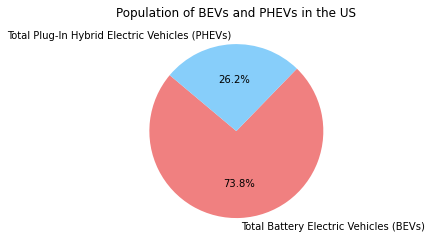

In [15]:
# Plot a pie graph with totals of BEVs and PHEVs
plt.pie([total_BEVs,total_PHEVs], labels=["Total Battery Electric Vehicles (BEVs)","Total Plug-In Hybrid Electric Vehicles (PHEVs)"], colors=["lightcoral", "lightskyblue"],
        autopct="%1.1f%%", startangle=140)
plt.title("Population of BEVs and PHEVs in the US")
plt.savefig("../figures/PopulationBEVsandPHEVs.png")
plt.show()

In [10]:
print(f"There are {total_BEVs} total Plug-In Hybrid Electric Vehicles and {total_PHEVs} total Battery Electric Vehicles in the US.")

There are 61335 total Plug-In Hybrid Electric Vehicles and 21719 total Battery Electric Vehicles in the US.


### **Findings**

There are 61335 total Plug-In Hybrid Electric Vehicles and 21719 total Battery Electric Vehicles in the US. This shows that Plug-In Hybrid Electric Vehicles are more popular that Battery Electric Vehicles. This is likely because drivers prefer to have two fuel options rather that just solely relying on electricity.

# **Adoption of Electric Vehicles over Time**

In [11]:
# Change date format
size_history_full_data["Date (formatted)"] = pd.to_datetime(size_history_full_data["Date"],format="%B %d %Y")

# Group data by date, then summarise columns of interest
date_data_EV_count = size_history_full_data.groupby("Date (formatted)")["Electric Vehicle (EV) Total"].sum()
date_data_total_count = size_history_full_data.groupby("Date (formatted)")["Total Vehicles"].sum()
date_data_percent = (date_data_EV_count / date_data_total_count)*100
date_data_percent = date_data_percent.map("{:.2f}".format)

# Assemble columns into dataframe
date_data = pd.DataFrame(
    {"Total Electric Vehicle (EV)": date_data_EV_count,
     "Total Vehicles": date_data_total_count,
     "Percent Electric Vehicles": date_data_percent
    }
)

# Display data
date_data

,Total Electric Vehicle (EV),Total Vehicles,Percent Electric Vehicles
Date (formatted),,,
2017-01-31,22743,6053442,0.38
2017-02-28,23466,6053997,0.39
2017-03-31,24184,6065934,0.40
2017-04-30,24995,6071668,0.41
2017-05-31,25716,6082175,0.42
2017-06-30,26487,6093918,0.43
2017-07-31,27185,6098438,0.45
2017-08-31,27848,6110573,0.46
2017-09-30,28572,6122029,0.47


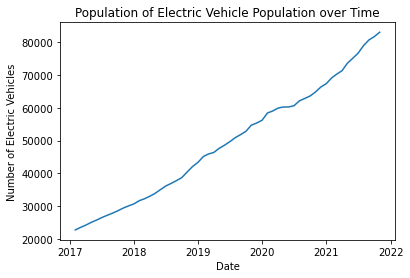

In [12]:
# Plot line graph of electric vehicle population over time
size_history_dates = date_data.index
size_history_EV_population = date_data["Total Electric Vehicle (EV)"]
size_history_total_population = date_data["Total Vehicles"]
size_history_EV_percent = date_data["Percent Electric Vehicles"]

plt.plot(size_history_dates,size_history_EV_population,label = "Total Electric Vehicle (EV)")
plt.title("Population of Electric Vehicle Population over Time")
plt.xlabel('Date')
plt.ylabel('Number of Electric Vehicles')
plt.savefig("../figures/PopulationEVs.png")
plt.show()

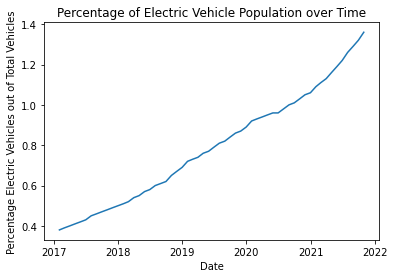

In [13]:
# Plot line graph of electric vehicle percent of total vehicles over time
size_history_EV_percent_int = pd.to_numeric(size_history_EV_percent, downcast='integer')
plt.plot(size_history_dates,size_history_EV_percent_int)
plt.title("Percentage of Electric Vehicle Population over Time")
plt.xlabel('Date')
plt.ylabel('Percentage Electric Vehicles out of Total Vehicles')
plt.savefig("../figures/PercentageEVs.png")
plt.show()

In [14]:
# Convert dates to integers to perform linear regression
date_data.index = date_data.index.map(dt.date.toordinal)
size_history_dates = date_data.index

In [15]:
# Calculate the correlation coefficient and linear regression model for EV population and total vehicle population
(slope1, intercept1, rvalue1, pvalue1, stderr1) = st.linregress(size_history_dates,size_history_EV_population)
(slope2, intercept2, rvalue2, pvalue2, stderr2) = st.linregress(size_history_dates,size_history_total_population)
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

print(f"Calculated trendline for EV population is {line_eq1}.")
print(f"Calculated trendline for total vehicle population is {line_eq2}.")

projected_date = dt.date(2025, 1, 31)
projected_date_ordinal = projected_date.toordinal()
projected_EV_population = round(((34.28*projected_date_ordinal) - 25219008.22), 0)
projected_total_vehicle_population = round(((139.22*projected_date_ordinal) - 96400635.31), 0)
projected_EV_percent = round(((projected_EV_population / projected_total_vehicle_population)*100), 2)

print(f"For January 31 2025, we may project that the electric vehicle population is {projected_EV_population}, and the total vehicle population is {projected_total_vehicle_population}, resulting in the percentage of electric vehicles being {projected_EV_percent}%.")

Calculated trendline for EV population is y = 34.28x + -25219008.22.
Calculated trendline for total vehicle population is y = 139.22x + -96400635.31.
For January 31 2025, we may project that the electric vehicle population is 123579.0, and the total vehicle population is 6522205.0, resulting in the percentage of electric vehicles being 1.89%.


### Findings

From the table and the line plot above, we can see that the population and percentage of electric vehicles has consistently increased over time since January 2017. This data can be used to estimate that by January 31 2025, the population of electric vehicles in the US may increase to 123,579, which may be 1.89% of a potential 6,522,205 vehicles in the US at that time.